In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset (Kaggle Telco dataset)
url = r"C:\Users\Sahilsharma\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)


In [4]:
# Inspect dataset
df.head()
df.info()

# Remove unnecessary columns
df.drop(['customerID'], axis=1, inplace=True)

# Convert 'TotalCharges' to numeric, handling missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Check for missing values
print(df.isnull().sum())

# Label encoding for categorical variables
label_enc = LabelEncoder()
df['Churn'] = label_enc.fit_transform(df['Churn'])

# Convert categorical features to dummy variables
df = pd.get_dummies(df, drop_first=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Split dataset into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional but improves some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)


Confusion Matrix:
[[942  94]
 [202 171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 78.99%


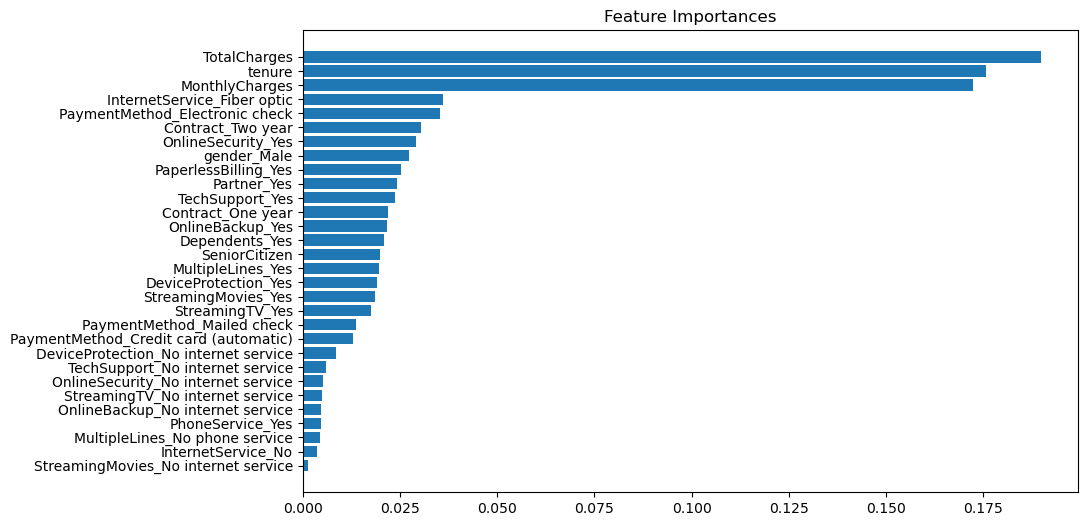

In [7]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Feature Importance Plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.gca().invert_yaxis()
plt.show()


In [9]:
# Example: Predict for a new customer (dummy data)
# Ensure the new customer has the same features as the training data
# First, create the new customer as a DataFrame
new_customer = pd.DataFrame({
    'gender': ['Female'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [1],
    'PhoneService': ['No'],
    'MultipleLines': ['No phone service'],
    'InternetService': ['DSL'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['Yes'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [29.85],
    'TotalCharges': [29.85]
})

# Apply the same preprocessing to the new customer data
# Convert categorical variables to dummies
new_customer_processed = pd.get_dummies(new_customer, drop_first=True)

# Align new_customer_processed columns with training data columns
new_customer_processed = new_customer_processed.reindex(columns=X.columns, fill_value=0)

# Now, scale the new customer data
new_customer_scaled = scaler.transform(new_customer_processed)

# Predict using the trained model
prediction = rf_model.predict(new_customer_scaled)

print(f"Churn Prediction for new customer: {'Yes' if prediction[0] == 1 else 'No'}")



Churn Prediction for new customer: No
